<div class="alert alert-warning">
<h2> Классификация: логистическая регрессия</h2>
</div> 

Логистическая регрессия обычно используется для целей классификации. В отличие от линейной регрессии, зависимая переменная может принимать ограниченное количество значений только, т. Е. Зависимая переменнаякатегорический, Когда число возможных результатов только два, это называется Бинарная логистическая регрессия,

В линейной регрессии выход является взвешенной суммой входных данных. Логистическая регрессия - это обобщенная линейная регрессия в том смысле, что мы не выводим взвешенную сумму входных данных напрямую, а пропускаем ее через функцию, которая может отображать любое действительное значение в диапазоне от 0 до 1.

Задача классификации:
$$\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik} = y_i,$$
где $X_i = (x_{i1}, \ldots, x_{ik})$ -- строка с данными, $y_i\in\{0, 1\}$, $\beta_0, \ldots, \beta_k$ -- неизвестные коэффициенты.
Проблема в том, что слева стоит непрерывная функция по $x$, а справа -- дискретная переменная. Кроме того, при больших значениях $x$ функция слева будет гарантированно давать большие значения. Так что применить модель прямо в таком виде -- плохая идея.

Введём логистическую функцию (сигмоид) $\sigma(x)=\frac{1}{1+e^{-x}}$.

Задача оптимизации рещается метод наискорейего спуска

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Text(0.5, 1.0, 'Логистическая функция')

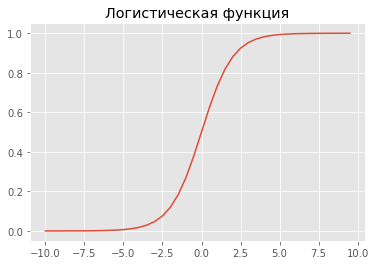

In [2]:
x = np.array(np.arange(-10, 10, 0.5))
y = 1. / (1 + np.exp(-x))
plt.plot(x, y)

plt.title(u'Логистическая функция')

[Видео](https://yandex.ru/video/preview/?text=логистическая%20регрессия%20python&path=wizard&parent-reqid=1625738026058960-16364192227391963148-balancer-knoss-search-yp-sas-9-BAL-3378&wiz_type=vital&filmId=12021206079927630681)

In [4]:
dataset = pd.read_csv('data//User_Data.csv')
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# вход
x = dataset.iloc[:, [2, 3]].values 
# выход
y = dataset.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split
# Разделение набора данных для обучения и тестирования. 75% данных используется для обучения модели, 
# а 25% — для тестирования производительности нашей модели.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

Теперь очень важно выполнить масштабирование функций здесь, потому что значения возраста и предполагаемой зарплаты находятся в разных диапазонах. Если мы не масштабируем объекты, то функция Предполагаемая заработная плата будет доминировать в функции Возраст, когда модель найдет ближайшего соседа к точке данных в пространстве данных.

The standard score (StandardScaler) of a sample x is calculated as:

$$z = \frac {(x - u)}{s}$$

In [8]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, 
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
#                                 L2 - сумма квадратов коэффициентов
#                                  L1 - сумма квадратов модулей
                                
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
#                                 ищется grid-serch
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1, multi_class='ovr', random_state=0, solver='liblinear')

По горизонтальной оси ROC кривой False Positive Rate $ FPR= \frac{FP}{FP+TN}$

По вертикальной оси ROC кривой True Positive Rate $ TPR=recall= \frac{TP}{TP+FN}$

# расчеты для xtain

In [10]:
y_pred = classifier.predict(xtrain)
# выдай мне рузультат как бы виде вероятности
pred_prob = classifier.predict_proba(xtrain)

In [11]:
from sklearn import metrics
preds = pred_prob[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(ytrain, preds)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

# расчеты для xtest

In [12]:
y_pred = classifier.predict(xtest)
pred_prob = classifier.predict_proba(xtest)

In [13]:
from sklearn import metrics
preds = pred_prob[:,1]
# для расчета roc_auc используем правильные ответы ytest и вероятности получить их из preds
# здесь threshold (отсечка ) равна 0.5
fpr_test, tpr_test, threshold = metrics.roc_curve(ytest, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


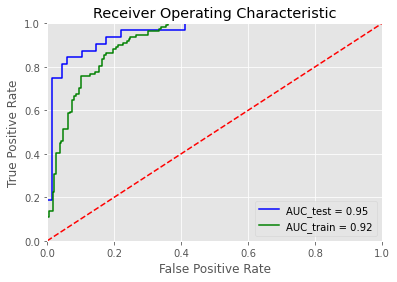

In [14]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'g', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
                        recall_score, classification_report, confusion_matrix


for i in [accuracy_score, f1_score, precision_score,  recall_score]:
    print (str(i).split(' ')[1] + " : ", i(ytest, y_pred))


accuracy_score :  0.89
f1_score :  0.8135593220338982
precision_score :  0.8888888888888888
recall_score :  0.75


In [16]:
print('\n clasification report:\n', classification_report(ytest, y_pred))
print('\n confussion matrix:\n',confusion_matrix(ytest, y_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100


 confussion matrix:
 [[65  3]
 [ 8 24]]


 - `Accuracy` - доля правильно распознанных ответов
  $$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
  - недостаток: не работает на несбалансированных классах
  - достоинтва: интерпритируем
 - `Presision(точность)` - доля правильно расвознных 1 из всех распозннынх как 1
 $$Presision = \frac{TP}{TP+ FP}$$
   - достоинтва:  работает на несбалансированных классах
 - `Recall (полнота)` - доля правильно распозннных 1 из всех 1
  $$Recall = \frac{TP}{TP+FN}$$
  - достоинтва:  работает на несбалансированных классах
  - $F_1$ - среднее гармоническое Presision и Recall
  $$F_1 = \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}...+...\frac{1}{x_n}} $$
      $$F_1 = \frac{2}{\frac{1}{Recall}+\frac{1}{Presision}} = 2*\frac{Recall*Presision}{Recall+ Presision} $$
  $F_\beta$ - среднее гармоническое с разными весами для Presision и Recall

     $$F_1 = (1+\beta^2)\frac{Recall*Presision}{\beta^2 * Recall+ Presision} $$
   -  $\beta > 1$ - если важнее Recall
  - $0<\beta < 1$ - если важнее Presision

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


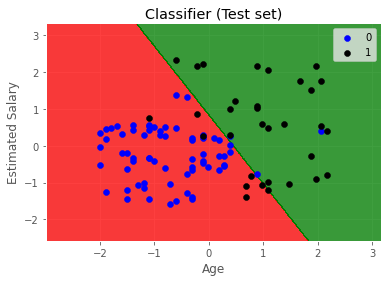

In [17]:
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape( X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'black'))(i), label = j)

      

plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Другой пример

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
THRESHOLD = 0.25
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds),
                   recall_score(y_test, preds),
                   precision_score(y_test, preds), 
                   roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.933333
recall,0.861111
precision,0.645833
roc_auc_score,0.901644


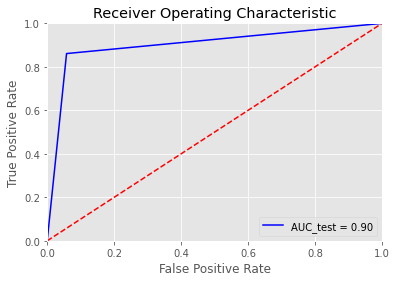

In [19]:
from sklearn import metrics

fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
roc_auc_test = metrics.auc(fpr_test, tpr_test)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# если использовать деволтное значение и рассчитать roc_score, то площадь под кривой 0.9563492063492064
fpr_train, tpr_train, threshold = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc_train = metrics.auc(fpr_train, tpr_train)
roc_auc_train

0.9563492063492064

In [21]:
from sklearn import metrics

box = [] 
for THRESHOLD in np.arange(0, 1, 0.0001):
    preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

    fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, preds)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    box.append([round(THRESHOLD, 4), roc_auc_test])

In [22]:
sorted(box, key = lambda x: -x[1])[0]

[0.1739, 0.927721088435374]

<div class="alert alert-warning">
<h2> Кластеризация: кластерный анализ </h2>
</div> 

[clustering](https://scikit-learn.ru/clustering/)

In [23]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline

(-15.0, 15.0)

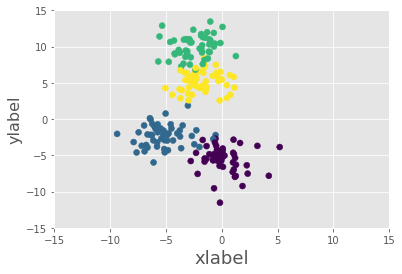

In [24]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt# 
# создадим датасет c 4 centers
data_init = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
data = pd.DataFrame(*data_init, columns = ['Y', 'X'])
# построим сктатер плот
plt.scatter(data['Y'], data['X'],c = data_init[1] ,cmap='viridis')
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
plt.xlim(-15,15)
plt.ylim(-15,15)

In [25]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
col = ['Y', 'X']
dataNorm = preprocessing.MinMaxScaler().fit_transform(data[col].values)

In [26]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

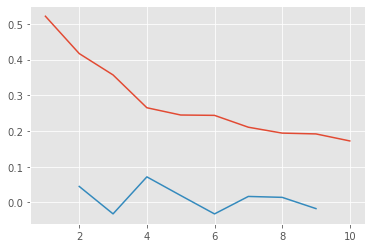

Рекомендованное количество кластеров: 4


In [28]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

# Метод дендрограмм (иерархическая кластеризация)

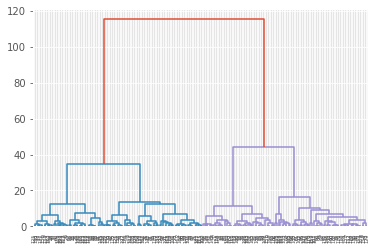

In [29]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))# create clusters

#строим дендрограмму

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(data)
plt.show()

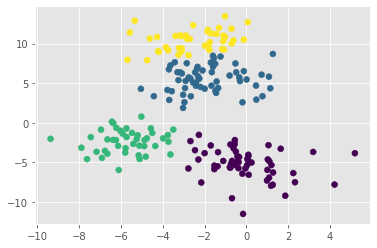

In [30]:
data['y_hc']=y_hc
plt.scatter(data['Y'], data['X'],c = data['y_hc'] ,cmap='viridis')

In [31]:
# к оригинальным данным добавляем номера кластеров
data['AgglomerativeClustering']=y_hc
res=data.groupby('AgglomerativeClustering')[col].mean()
res['Количество']=data.groupby('AgglomerativeClustering').size().values
res

,Y,X,Количество
AgglomerativeClustering,,,
0,-0.038672,-5.232762,56
1,-1.869099,5.474758,59
2,-5.708301,-2.369183,43
3,-2.531833,10.401160,42


# KMeans

K-средства являются наиболее часто используемой формой кластеризации благодаря своей скорости и простоте.

In [32]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=4).fit(dataNorm)
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
km.labels_ +1

array([4, 3, 1, 4, 2, 3, 4, 3, 3, 2, 2, 4, 2, 1, 2, 1, 4, 4, 2, 2, 2, 1,
       4, 4, 4, 1, 4, 3, 1, 4, 4, 2, 2, 3, 3, 2, 2, 2, 1, 1, 4, 2, 1, 1,
       3, 3, 4, 1, 1, 4, 3, 2, 1, 4, 1, 1, 3, 2, 2, 1, 3, 3, 4, 3, 3, 4,
       3, 1, 4, 4, 3, 2, 4, 3, 1, 1, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 4, 3,
       4, 2, 3, 4, 3, 1, 1, 3, 3, 1, 3, 1, 2, 3, 1, 4, 1, 3, 1, 3, 2, 4,
       3, 2, 4, 4, 2, 1, 4, 4, 1, 3, 1, 4, 4, 4, 3, 4, 4, 1, 1, 3, 2, 3,
       3, 1, 4, 1, 3, 4, 4, 2, 4, 1, 1, 3, 2, 4, 3, 1, 3, 2, 4, 2, 1, 3,
       3, 1, 4, 3, 3, 3, 1, 1, 3, 3, 2, 2, 2, 1, 3, 3, 3, 3, 2, 1, 3, 4,
       2, 3, 4, 1, 3, 1, 1, 4, 2, 3, 2, 4, 1, 3, 1, 1, 2, 1, 3, 4, 2, 1,
       2, 4])

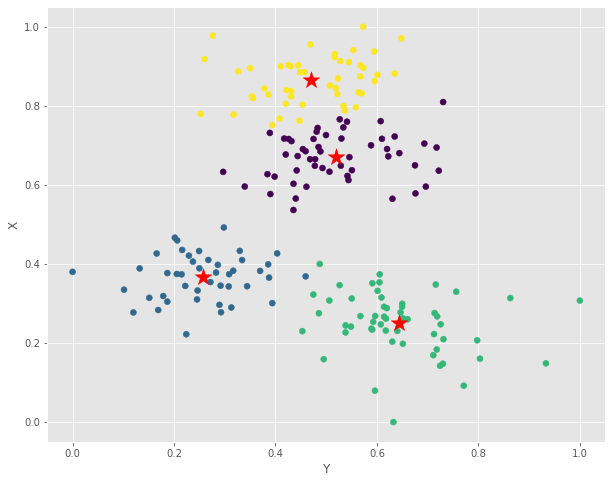

In [33]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='viridis')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [34]:
# к оригинальным данным добавляем номера кластеров
data['KMeans']=km.labels_+1
res=data.groupby('KMeans')[col].mean()
res['Количество']=data.groupby('KMeans').size().values
res

,Y,X,Количество
KMeans,,,
1,-1.810917,5.200787,53
2,-5.639434,-2.368254,44
3,0.009318,-5.285570,55
4,-2.513234,10.087869,48
